# Atividade R2

Feito por:

- Adriano das Chagas
- Brendon Gomes
- Elias Barbosa
- Rafael Rodrigues Gonçalves

Este projeto tem como objetivo explorar os dados históricos de sorteios da Mega-Sena para realizar análises estatísticas e aplicar técnicas de aprendizado de máquina, especificamente regressão linear. O foco está em compreender a relação entre os números sorteados e suas frequências de ocorrência ao longo dos anos, utilizando diferentes abordagens e filtros nos dados.

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

O arquivo Excel contém dados históricos dos números sorteados na Mega-Sena e suas respectivas frequências de ocorrência.

In [6]:
df = pd.read_excel("numeros_megasena_incidencia2.xlsx")

- **x:** Contém os números das bolas sorteadas (todas as colunas, exceto a última). Representa a variável independente.
- **y:** Contém as frequências de ocorrência de cada número (última coluna). Representa a variável dependente, ou seja, o que queremos prever.

In [7]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

Criar um gráfico de dispersão para visualizar a relação entre os números sorteados (x) e suas ocorrências (y).

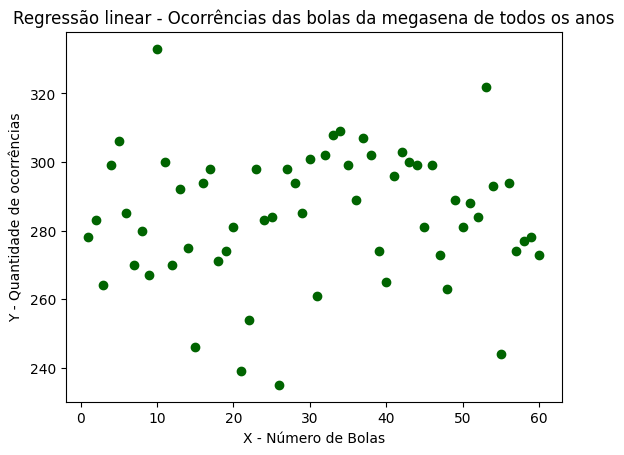

In [8]:
plt.scatter(x,y, color = "darkgreen")
plt.title('Regressão linear - Ocorrências das bolas da megasena de todos os anos')
plt.xlabel('X - Número de Bolas')
plt.ylabel('Y - Quantidade de ocorrências')
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression

Gera previsões para os valores de y (frequência de ocorrência) com base nos valores correspondentes de x. (variável ypred):

O gráfico exibe:
- Os pontos verdes representando os dados reais.
- A linha azul representando a predição do modelo (linha ajustada pelo método dos mínimos quadrados).

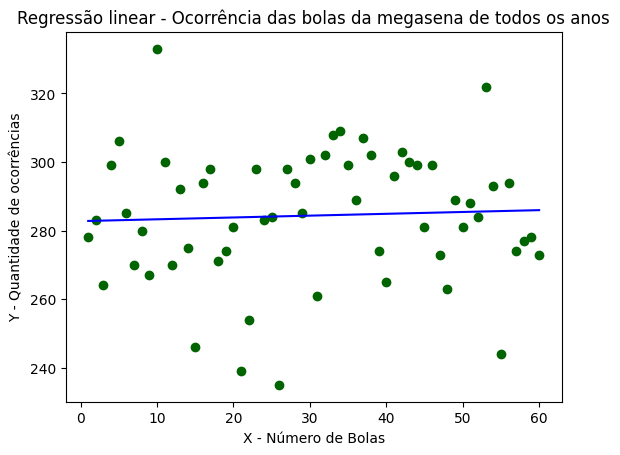

In [10]:
regressor = LinearRegression()
regressor.fit(x,y)

ypred = regressor.predict(x)

plt.scatter(x,y, color = "darkgreen")
plt.plot(x,ypred, color = "blue")

plt.title('Regressão linear - Ocorrência das bolas da megasena de todos os anos')
plt.xlabel('X - Número de Bolas')
plt.ylabel('Y - Quantidade de ocorrências')
plt.show()

Calcula o coeficiente de determinação
R2, que mede o quão bem o modelo explica a variação dos dados:

- R2 = 1: Modelo perfeito.
- R2 = 0: O modelo não explica nada além da média.

**O estudo de caso da megasena apresentado exibe um modelo que não é perfeito devido ao fato de que o contexto da megasena é baseado totalmente em sorteio aleatório e não é utilizado dados progressivos ou contínuos**

In [11]:
regressor.score(x,y)

0.0023601928795213833

## Predição

In [12]:
regressor.predict([[0.3]])

array([282.78720756])

## Coeficiente Angular e Linear

- coef_: Coeficiente angular (m), que indica a inclinação da linha ajustada.
- intercept_: Coeficiente linear(b), que indica onde a linha cruza o eixo Y.
- A equação da reta ajustada é dada por: y = mx + b

In [13]:
regressor.coef_

array([0.05340372])

In [14]:
regressor.intercept_

np.float64(282.7711864406779)

# Filtro com valores entre 278 e 290 (mediana é 284,5)


- Converte y em uma série do Pandas e calcula sua mediana (valor central dos dados).
- A mediana é usada como referência para filtrar um subconjunto específico dos dados.

In [25]:
serieY = pd.Series(y)
print("Valor da mediana: ")
serieY.median()

Valor da mediana: 


284.5

### Filtro por faixa específica (278–290)

- Carrega um novo dataset contendo apenas números cuja frequência está entre 278 e 290.
- Separa novamente as variáveis independentes (x2) e dependentes (y2) para análise.

In [16]:
df2 = pd.read_excel("numeros_megasena_incidencia2_entre_278_e_290.xlsx")

x2 = df2.iloc[:,:-1].values
y2 = df2.iloc[:,-1].values

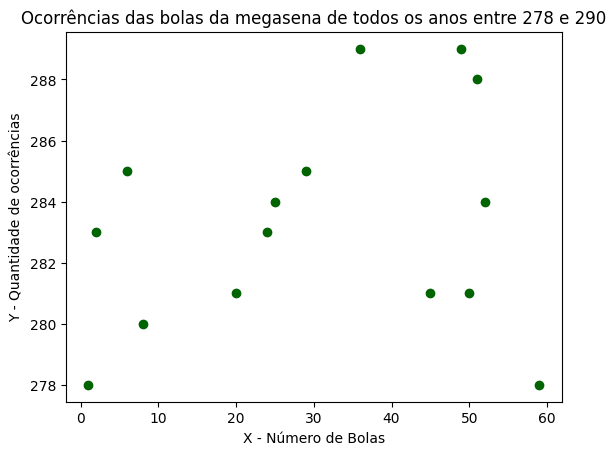

In [17]:
plt.scatter(x2,y2, color = "darkgreen")
plt.title('Ocorrências das bolas da megasena de todos os anos entre 278 e 290')
plt.xlabel('X - Número de Bolas')
plt.ylabel('Y - Quantidade de ocorrências')
plt.show()

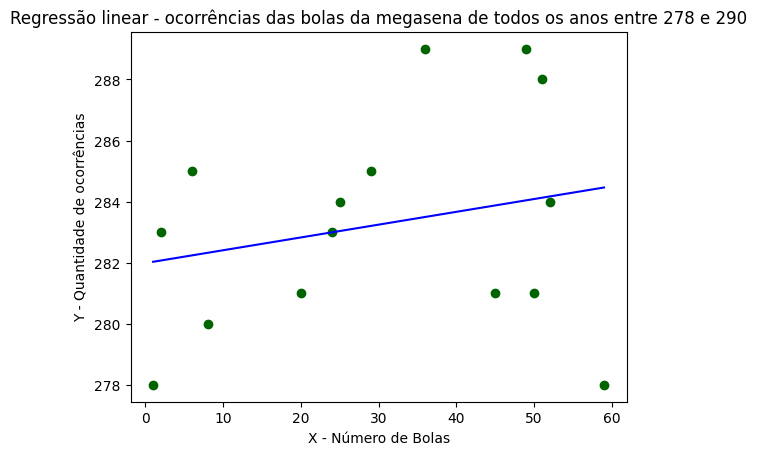

In [26]:
regressor = LinearRegression()
regressor.fit(x2,y2)

ypred2 = regressor.predict(x2)

plt.scatter(x2,y2, color = "darkgreen")
plt.plot(x2,ypred2, color = "blue")

plt.title('Regressão linear - ocorrências das bolas da megasena de todos os anos entre 278 e 290')
plt.xlabel('X - Número de Bolas')
plt.ylabel('Y - Quantidade de ocorrências')
plt.show()

# Filtro com os valores entre 10 anos (2024 - 2014)

- Carrega um dataset contendo apenas os números sorteados nos últimos 10 anos (2014–2024).
- Treina um novo modelo com esses dados para verificar se há mudanças nas tendências ao longo do tempo.

In [19]:
df10anos = pd.read_excel("numeros_10_anos.xlsx")

x10anos = df10anos.iloc[:,:-1].values
y10anos = df10anos.iloc[:,-1].values

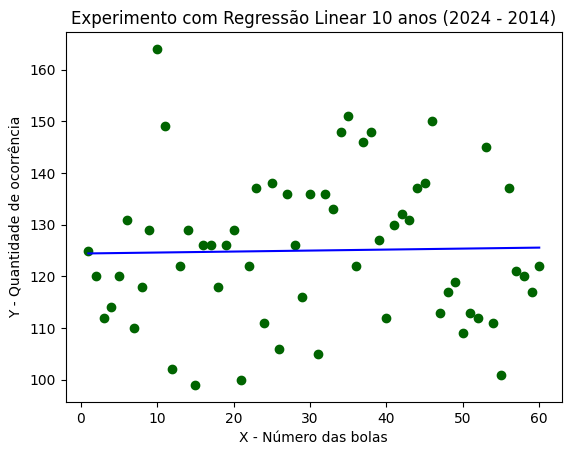

In [20]:
regressor10anos = LinearRegression()
regressor10anos.fit(x10anos,y10anos)

ypred10anos = regressor10anos.predict(x10anos)

plt.scatter(x10anos,y10anos, color = "darkgreen")
plt.plot(x,ypred10anos, color = "blue")

plt.title('Experimento com Regressão Linear 10 anos (2024 - 2014)')
plt.xlabel('X - Número das bolas')
plt.ylabel('Y - Quantidade de ocorrência')
plt.show()

In [21]:
regressor10anos.score(x10anos,y10anos)

0.0005393393525003898

In [22]:
regressor10anos.predict([[0.3]])

array([124.42436232])

In [23]:
regressor10anos.coef_

array([0.01906085])

In [24]:
regressor10anos.intercept_

np.float64(124.4186440677966)

## Conclusão

Este código realiza uma análise exploratória e modelagem preditiva usando regressão linear nos números sorteados da Mega-Sena. Ele permite:
- Visualizar padrões gerais e específicos nos dados históricos.
- Avaliar tendências em diferentes períodos (todos os anos vs últimos 10 anos).
- Observar como as frequências variam em faixas específicas ou ao longo do tempo.

### Resultados

- O objetivo do código é analisar a frequência de números sorteados na Mega-Sena utilizando regressão linear para identificar possíveis padrões.
- No entanto, o resultado obtido (R2 = 0.00236)indica que o modelo não consegue explicar a variação nos dados, reforçando a imprevisibilidade dos sorteios.

Durante o desenvolvimento do estudo de caso de análise de dados da megasena percebe-se os seguintes pontos:

1. **Imprevisibilidade dos sorteios:** A Mega-Sena é projetada para ser aleatória, e os números sorteados não apresentam relação significativa com suas frequências históricas.
1. **Limitação do modelo:** O valor extremamente baixo demonstra que a regressão linear não é capaz de encontrar padrões úteis nos dados.
1. **Análise descritiva vs preditiva:**
Embora seja possível analisar estatísticas descritivas (como mediana e frequência), prever resultados futuros com base em dados passados é inviável devido à natureza randômica do jogo.
1. **Filtros específicos (faixa de ocorrências e últimos 10 anos):**
Mesmo ao restringir os dados a subconjuntos (ex.: números com frequência entre 278 e 290 ou sorteios dos últimos 10 anos), os resultados no geral permanecem totalmente aleatórios.

